In [1]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ktrain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 70.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 63.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import ktrain
from ktrain import text

In [4]:
from platform import python_version

print(python_version())

3.10.12


In [5]:
!pip install transformers

In [6]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Cyberbullying/cleaned_dataset/twitter_parsed_dataset.csv")


In [7]:
data['label'].value_counts()

0.0    11210
1.0     5339
Name: label, dtype: int64

In [8]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25, random_state=42)

print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)

Training data shape: (12411, 2)
Testing data shape: (4138, 2)


In [9]:
train['label'].value_counts(),test['label'].value_counts()

(0.0    8380
 1.0    4031
 Name: label, dtype: int64,
 0.0    2830
 1.0    1308
 Name: label, dtype: int64)

In [10]:
train.head()

,label,correct_text
4291,0.0,fav part skim gg tweet see many people insist ...
13028,0.0,guess never read quran hadith spout lw line
12680,0.0,understand english perfect microbrain
10525,1.0,rt sexist subscribed single female youtuber
11906,0.0,create new account change username


In [11]:
test.head()

,label,correct_text
9568,0.0,rt elephant come ya watch probably celine vikk...
8824,1.0,already read entire quran piece filth hatred v...
12940,0.0,picture gruesome execution daesh evidence success
10175,0.0,wow low group score deserve little think mkr s...
3706,0.0,one conspiracy theory turkish army collaborati...


In [12]:
X_train=train['correct_text'].values
y_train=train['label'].values


In [13]:
X_test = test['correct_text'].values
y_test=test['label'].values

In [14]:
MODEL_NAME = 'textattack/bert-base-uncased-imdb'
#MODEL_NAME = 'xlm-roberta-base'

t = text.Transformer(MODEL_NAME, maxlen=400, classes=np.array([0,1]))
trn = t.preprocess_train(np.array(X_train),np.array(y_train))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, batch_size=16)

/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


preprocessing train...
language: en
train sequence lengths:
	mean : 8
	95percentile : 14
	99percentile : 16


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:768: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn(


Is Multi-Label? False


/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:1093: UserWarning: Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn(


In [15]:
learner.fit_onecycle(1e-5, 5)




begin training using onecycle policy with max lr of 1e-05...
Epoch 1/5
776/776 [==============================] - 1072s 1s/step - loss: 0.5832 - accuracy: 0.7271
Epoch 2/5
776/776 [==============================] - 1033s 1s/step - loss: 0.4299 - accuracy: 0.8124
Epoch 3/5
776/776 [==============================] - 1032s 1s/step - loss: 0.3648 - accuracy: 0.8438
Epoch 4/5
776/776 [==============================] - 1032s 1s/step - loss: 0.2854 - accuracy: 0.8815
Epoch 5/5
776/776 [==============================] - 1032s 1s/step - loss: 0.2003 - accuracy: 0.9196


In [16]:
pred = ktrain.get_predictor(learner.model,preproc = t)

In [17]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
import numpy as np
# Make predictions on the test data using the predictor
y_pred_probs = pred.predict(X_test, return_proba=True)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
test_loss = log_loss(y_test, y_pred_probs)
# Print the test loss
print("\nTest Loss:", test_loss)

test_accuracy = accuracy_score(y_test, y_pred_labels)
print("\nTest Accuracy:", test_accuracy)

y_pred_probs = pred.predict(X_test, return_proba=True)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Print the classification report
report = classification_report(y_test, y_pred_labels, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:")
print(report)



Test Loss: 0.46054316586968547

Test Accuracy: 0.8395360077332045
Confusion Matrix:
[[2509  321]
 [ 343  965]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.89      0.88      2830
     Class 1       0.75      0.74      0.74      1308

    accuracy                           0.84      4138
   macro avg       0.82      0.81      0.81      4138
weighted avg       0.84      0.84      0.84      4138



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Print the classification report
report = classification_report(y_test, y_pred_labels, target_names=['0', '1'])
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[2509  321]
 [ 343  965]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2830
           1       0.75      0.74      0.74      1308

    accuracy                           0.84      4138
   macro avg       0.82      0.81      0.81      4138
weighted avg       0.84      0.84      0.84      4138



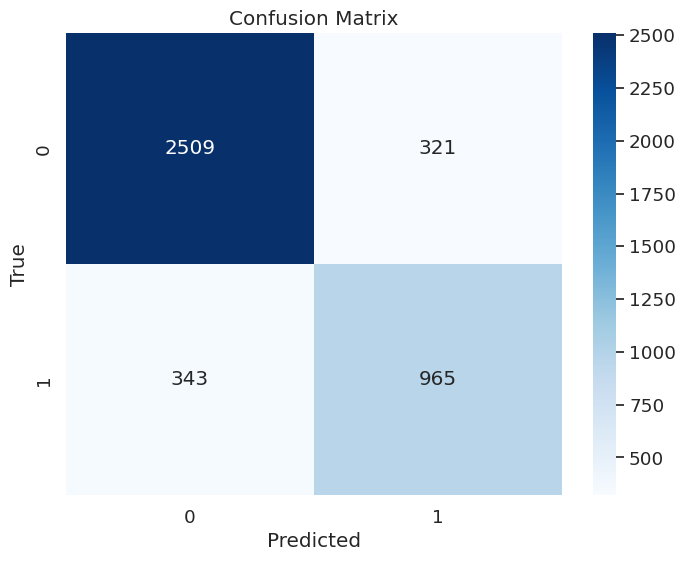

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_labels)

# Define class labels
class_labels = ['0', '1']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
